In [18]:
# Import the requests library.
import requests
import json
import numpy as np
import pandas as pd
from citipy import citipy as cp
import matplotlib.pyplot as plt

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
latitudes = np.random.uniform(-90.000, 90.000, 1500)
longitudes = np.random.uniform(-180.000,180.000,1500)

lat_lngs = zip(latitudes, longitudes)
coords = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coords:
    city = cp.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

569

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
  #      time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | ahipara
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | novobohdanivka
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | lityn
Processing Record 13 of Set 1 | batagay-alyta
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | nome
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | kastamonu
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | hudson bay
Processing Record 21 of Set 1 | diphu
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | arraial do cabo
Processing Record 24 of Set

Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | yangcun
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | fayaoue
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | mucurapo
Processing Record 2 of Set 5 | roma
Processing Record 3 of Set 5 | vila velha
Processing Record 4 of Set 5 | depew
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | santander
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | formosa
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | umm lajj
Processing Record 12 of Set 5 | la seyne-sur-mer
Processing Record 13 of Set 5 | birin
Processing Record 14 of Set 5 | grand-bourg
Processing Record 15 of Set 5 | acapulco
Processing Record 16 of Set 5 | gombong
Processing Record

Processing Record 35 of Set 8 | marseille
Processing Record 36 of Set 8 | fairbanks
Processing Record 37 of Set 8 | khomutovka
Processing Record 38 of Set 8 | boende
Processing Record 39 of Set 8 | belyy
Processing Record 40 of Set 8 | quatre cocos
Processing Record 41 of Set 8 | caracoli
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | thinadhoo
Processing Record 44 of Set 8 | hvide sande
Processing Record 45 of Set 8 | chara
Processing Record 46 of Set 8 | takoradi
Processing Record 47 of Set 8 | puerto escondido
Processing Record 48 of Set 8 | gat
Processing Record 49 of Set 8 | azimur
City not found. Skipping...
Processing Record 50 of Set 8 | dunedin
Processing Record 1 of Set 9 | ilebo
Processing Record 2 of Set 9 | prince rupert
Processing Record 3 of Set 9 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 9 | wawa
Processing Record 5 of Set 9 | abiy adi
City not found. Skipping...
Processing Record 6 of Set 9 | westerly
Processing Record 7 o

Processing Record 19 of Set 12 | lokosovo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-02-03 01:54:45,55.7435,-97.8558,-11.04,64,20,16.11
1,Dikson,RU,2022-02-03 01:54:58,73.5069,80.5464,-5.93,96,100,13.13
2,Ahipara,NZ,2022-02-03 01:54:58,-35.1667,173.1667,75.72,65,83,14.29
3,Avarua,CK,2022-02-03 01:53:51,-21.2078,-159.7750,84.25,79,40,18.41
4,Saskylakh,RU,2022-02-03 01:53:45,71.9167,114.0833,-31.94,100,17,2.89
...,...,...,...,...,...,...,...,...,...
516,Ipswich,GB,2022-02-03 01:58:21,52.0592,1.1555,47.39,87,100,9.73
517,Ishim,RU,2022-02-03 01:58:21,56.1128,69.4902,9.73,97,79,7.70
518,Parabel,RU,2022-02-03 01:58:22,58.6978,81.4825,13.37,91,100,9.57
519,Kinablangan,PH,2022-02-03 01:58:22,7.6947,126.5503,76.21,84,100,3.27


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

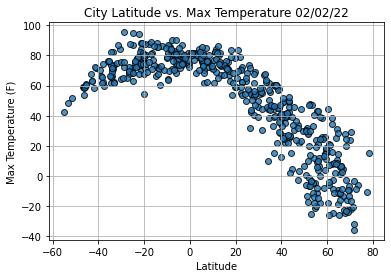

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

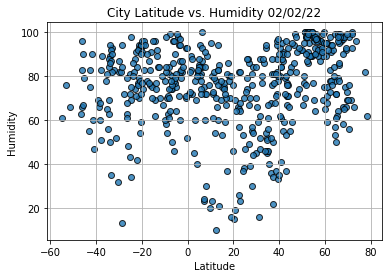

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

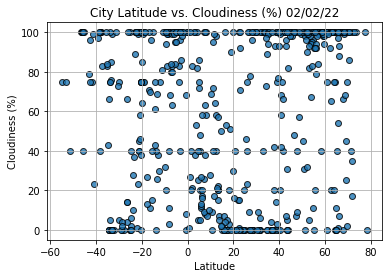

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

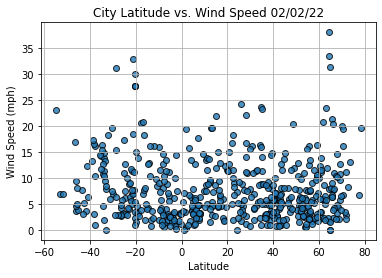

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()